### Week 9 Lecture notes
# Probability

The probability of an outcome for a random event is a number between 0 and 1 that represents the likelyhood of that outcome occurring.

Probability can be represented as
* percentage
* fraction
* ratio
* decimal

**Example:**  The probability of a coin toss resulting in heads is 0.5, or 50%, 1/2, 1:1.

**Example:** The probability of rolling a 5 with a standard six-sided dice is 1/6, or 1:5, 0.1666666..., 16.66666...%

Probability of independent events is *multiplicative* with respect to **and**

**Example:** The probability of rolling a 5 followed by a 3 is 1/6 times 1/6, or 1/36.

Probability of independent events is *additive* with respect to **or**

**Example:**  The probability of rolling an 8 with two die

| Dice 1 | Dice 2 | Probability |
|:------:|:------:|:-----------:|
|   2    |   6    |    1/36     |
|   3    |   5    |    1/36     |
|   4    |   4    |    1/36     |
|   5    |   3    |    1/36     |
|   6    |   2    |    1/36     |
|        |        |    5/36     |

The probabilities of all the possible outcomes of a random event must add up to 1.

## Modeling random events

### Random Library

In [2]:
import random as rn

In [5]:
rn.random()         # Pseudo-random number between 0 and 1.

0.7268925608933166

In [8]:
help(rn.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [10]:
rn.randint(0,10)    # Pseudo-random integer between 0 and 10.

1

In [11]:
for i in range(10):
    print(rn.randint(0,10))
    

2
2
3
7
4
9
8
2
9
2


### Modeling the toss of a coin

In [12]:
def toss_coin():
    x = rn.random()
    if x < 0.5:
        return 'H'
    else:
        return 'T'

In [17]:
toss_coin()

'H'

In [19]:
for i in range(10):
    print(toss_coin())

H
T
H
T
H
H
T
H
H
T


In [3]:
def toss_coin1(p=0.5):  # probability of heads is p, with default 0.5
    x = rn.random()
    if x < p:
        return 'H'
    else:
        return 'T'
    

In [21]:
for i in range(20):
    print(toss_coin1(0.7))

T
H
T
H
T
H
H
T
T
T
T
H
T
H
H
H
T
H
H
H


In [22]:
toss_coin1()

'H'

### Activity
1.) Write a function that uses `toss_coin` to perform $ n $ coin tosses and aggregates the results.  The function should have two inputs:  $ n $ and the probability of the coin landing on heads (default is 0.5).

2.) Write a function `roll_dice` that models the roll of a six sided dice.

3.) Modify your function in number 2 to include an input that specifies the number of sides of the dice (default is 6).

4.) Write a function that uses `roll_dice` to perform $ n $ trials of rolling two dice, and aggregates the results.  The function should have two inputs:  $ n $ and the number of sides of the die rolled (default is 6).

In [1]:
def coin_toss_trial(n,p=0.5):
    heads = 0
    tails = 0
    for i in range(n):
        toss = toss_coin1(p)
        if toss == 'H':
            heads += 1
        else:
            tails += 1
    return [['H',heads],['T',tails]]

In [5]:
coin_toss_trial(100,0.7)

[['H', 63], ['T', 37]]

In [7]:
coin_toss_trial(1000)

[['H', 484], ['T', 516]]

In [12]:
def roll_dice(s=6):
    return rn.randint(1,s)

In [13]:
roll_dice()

3

In [16]:
roll_dice(20)

14

In [18]:
def roll_dice1(s=6):
    x = rn.random()
    w = 1/s
    for i in range(1,s+1):
        if x > (i-1)*w and x <= i*w:
            return i

In [22]:
roll_dice1(12)

4

In [23]:
def dice_roll_trial(n,s=6):
    rolls_value = [i for i in range(2,2*s+1)]    # index is 2 less than the value of each entry
    rolls_count = [0 for i in range(2,2*s+1)]
    for i in range(n):
        roll = roll_dice(s) + roll_dice(s)
        rolls_count[roll-2] += 1
    return rolls_value,rolls_count     

In [24]:
dice_roll_trial(100,6)

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [5, 5, 9, 10, 22, 16, 10, 11, 6, 4, 2])

In [33]:
dice_roll_trial(1000,6)

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [17, 56, 86, 116, 137, 173, 152, 112, 71, 47, 33])

## Variable Probability

A particle moves in one direction (away from origin) in increments of 1.  As the particle gets further out, the probability of moving decreases.

If the particle is $ k $ units away from origin, the probability of moving is $$ p_k = \frac{1}{2^k} $$.

In [26]:
def particle(T):           # n is the number of time steps we are going to take.
    par = 0
    for t in range(T):
        x = rn.random()
        if x < 1/2**par:   # probability of moving one unit is based on current position
            par += 1
    return par

In [32]:
particle(100)

7

### Activity

1. Write a function that runs a simulation of a particle moving with probability $ p^k $ when it is $ k $ units away from the origin.
2. Write a function that runs $ N $ trials of the above function and aggregates and plots the results.
3. How do the results change as the probability changes?

In [34]:
def particle1(T,p=0.5): # Input the number of time steps and the probability
    k = 0               # the variable k stores the particles current position (distance from origin)
    for t in range(T):  # for each time step up to the total T
        x = rn.random() # produce a random number
        if x < p**k:    # and compare to the probability threshhold for moving on
            k += 1      # if the boolean check passes, then the particle moves one step away from the origin
    return k            # return the particle's position at the end

In [35]:
particle1(100,0.8)

15

In [42]:
def particle_trial(N,T,p=0.5):
    final_positions = [particle1(T,p) for n in range(N)]
    outcomes = [t for t in range(1,T+1)]
    counts = [0 for t in range(T)]
    for pos in final_positions:
        counts[pos-1] += 1
    return outcomes,counts

In [44]:
particle_trial(100,10,0.8)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 3, 21, 30, 29, 13, 4, 0, 0])

In [45]:
import matplotlib.pyplot as plt

In [66]:
def plot_particle_trials(N,T,p=0.5):
    final_positions = [t for t in range(1,T+1)]
    counts = particle_trial(N,T,p)[1]
    plt.bar(final_positions,counts,color='green')
    plt.xlabel('Final position of particle')
    plt.ylabel('Number of trials')
    plt.xticks(final_positions,final_positions)
    plt.show()

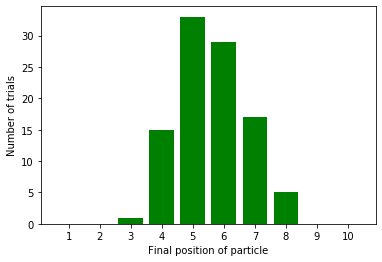

In [67]:
plot_particle_trials(100,10,0.8)

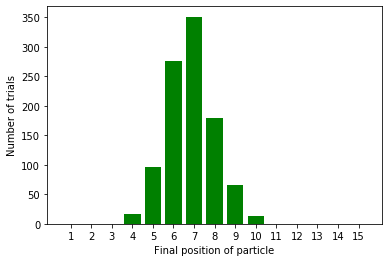

In [68]:
plot_particle_trials(1000,15,0.8)

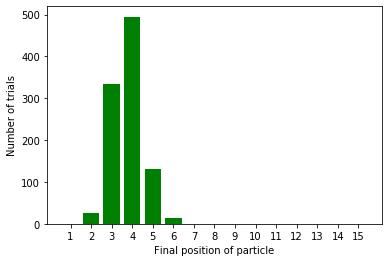

In [69]:
plot_particle_trials(1000,15)

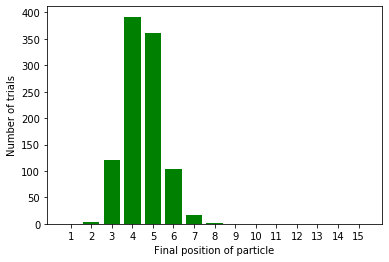

In [70]:
plot_particle_trials(1000,15,0.6)

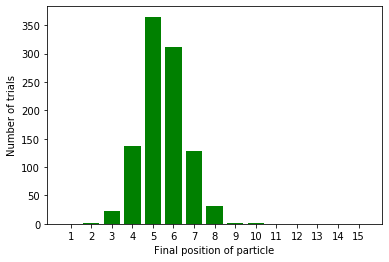

In [71]:
plot_particle_trials(1000,15,0.7)

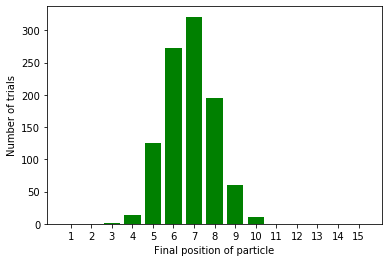

In [72]:
plot_particle_trials(1000,15,0.8)

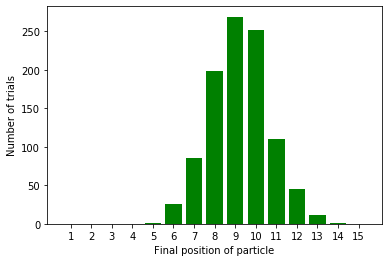

In [73]:
plot_particle_trials(1000,15,0.9)

In [76]:
def compare_probabilities(N,T):
    probabilities = [round(0.1*i,1) for i in range(1,11)]
    labels = []
    for p in probabilities:
        final_positions = [t for t in range(1,T+1)]
        counts = particle_trial(N,T,p)[1]
        plt.plot(final_positions,counts)
        labels.append('p={}'.format(p))
    plt.xlabel('Final position of particle')
    plt.ylabel('Number of trials')
    plt.legend(labels)
    plt.show()

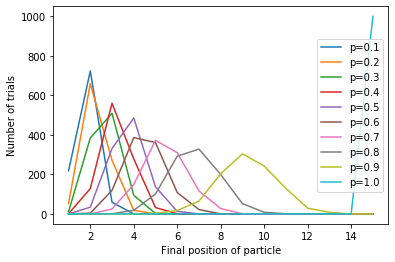

In [77]:
compare_probabilities(1000,15)